## <font color='blue'> RandIndex Overlapping Measure of Brain Atlases </font>
==============================================================

#### This Code is Written by:    Phd Student  <font color=Blue> Dalia A. A. Al-Ubaidi </font> <br> <div class="alert alert-info">University Technology Malaysia, UTM</div> <br> Email: aadalia-1980@graduate.utm.my
***

In [1]:
import numpy as np
import nibabel as nib
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
from scipy.special import comb
import nilearn.datasets as datasets
import nilearn.image as nlimg

#define Rand index function
def rand_index(actual, pred):
    
        # converting list to array 
    actual = np.array(actual) 
    pred = np.array(pred) 
    
    actual = actual.astype(int)
    pred = pred.astype(int)

    tp_plus_fp = comb(np.bincount(actual), 2).sum()
    tp_plus_fn = comb(np.bincount(pred), 2).sum()
    A = np.c_[(actual, pred)]
#     print(A)
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(actual))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    print(f"tp={tp} tn={tn} fp={fp} fn={fn} ")
    return (tp + tn) / (tp + fp + fn + tn)

#calculate Rand index
# print(rand_index([1, 1, 1, 2, 2], [1, 1, 2, 2, 3]))

def RandIndex_2Atlas(Atlas1_File,Desc1, Atlas2_File,Desc2):
    
# =============================== Start Processing ==========================    
# Load the two brain atlases as Nifti files
    atlas1 = nib.load(Atlas1_File) #"data4test/Shafer_17Networks.nii.gz")
    atlas2 = nib.load(Atlas2_File)


#     atlas2 = nlimg.resample_to_img(atlas2, atlas1)

# Get the data from the Nifti files
    atlas1_data = atlas1.get_fdata()
    atlas2_data = atlas2.get_fdata()

# Flatten the data into 1D arrays
    atlas1_flat = atlas1_data.flatten()
    atlas2_flat = atlas2_data.flatten()

# Calculate the rand coefficient
    rand_score = adjusted_rand_score(atlas1_flat, atlas2_flat)
#     rand_score = rand_index(atlas1_flat, atlas2_flat)
    
#     print('Rand Index of '+Desc1+' and '+Desc2+  ' = '+ str(rand_score))
    print(f"Rand Index of {Desc1} and {Desc2} = {rand_score}")
    return rand_score

# mutual_info_score= metrics.adjusted_mutual_info_score(atlas1_flat, atlas2_flat, average_method='arithmetic')
# homogeneity_score= metrics.homogeneity_score(atlas1_flat, atlas2_flat)
# completeness_score= metrics.completeness_score(atlas1_flat, atlas2_flat)
# v_measure_scor= metrics.v_measure_score(atlas1_flat, atlas2_flat)
# silhouette_score= metrics.silhouette_score(atlas1_flat, atlas2_flat)

# print('rand_score=', rand_score)
# print('mutual_info_score=', mutual_info_score)
# print('homogeneity_score=', homogeneity_score)
# print('completeness_score=', completeness_score)
# print('v_measure_scor=', v_measure_scor)
# print('silhouette_score=', silhouette_score)

# yeo = datasets.fetch_atlas_yeo_2011()
# yeo17_file = yeo['thick_17']
# power10_file="data4test/PowerAtlas_10Networks.nii.gz"
# power264_file= 'data4test/power264MNI.nii.gz'
# shafer17_file= "data4test/Shafer_17Networks.nii.gz"
# atlas_shafer= datasets.fetch_atlas_schaefer_2018(n_rois=100,yeo_networks=17)
# Shafer100_file =atlas_shafer['maps']  #atlas_shafer['labels']


F1=r'C:\Users\IT-Department\LLN Code Python\2nd Code\Work4ThesisInshallah\T_RSNs\Master_HexaNet_ATLAS.nii.gz'
F2=r'C:\Users\IT-Department\LLN Code Python\2nd Code\Work4ThesisInshallah\CAREN_byAALRegion_Combined\666_HexaNet_CRN_Atlas_6RSNs.nii.gz'
rr=RandIndex_2Atlas(F1,' ', F2, 'Yeo17') 
print('rand index=',rr)

# print('================= P1 =======================')
# rr=RandIndex_2Atlas(power264_file,'Power264', yeo17_file, 'Yeo17') 
# # print('power264 - yeo 17---> rand index=',rr)
# rr=RandIndex_2Atlas(power264_file,'Power264', Shafer100_file, 'Shafer100')
# # print('power264 - Shafer100---> rand index=',rr)
# rr=RandIndex_2Atlas(Shafer100_file,'Shafer100', yeo17_file, 'Yeo17')
# # print('Shafer100 - yeo 17---> rand index=',rr)
# # print('================= P2 =======================')
# RandIndex_2Atlas(power10_file,'Power10', yeo17_file, 'Yeo17')
# RandIndex_2Atlas(power10_file,'Power10', shafer17_file,'Shafer17')
# RandIndex_2Atlas(shafer17_file,'Shafer17', yeo17_file, 'Yeo17')

# print ('rand index=', rr)
# x = [1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 2, 2]
# y = [3, 2, 3, 2, 2, 1, 1, 2, 3, 1, 3, 1]
# print(rand_index(x,y))
# print('Z-score=',z_score)

Rand Index of   and Yeo17 = 0.3300273060703968
rand index= 0.3300273060703968


In [8]:
# ------------------- Call ARI for Atlases -----------------------
L = [   "ReSampled_Atlases/K_resampled_Yeo7thick_atlas.nii.gz",
        "ReSampled_Atlases/K1_resampled_power264_atlas.nii.gz",
        "ReSampled_Atlases/K_resampled_Schaefer100_atlas.nii.gz",
        "ReSampled_Atlases/K_resampled_CC200_atlas.nii.gz", #"ReSampled_Atlases/K_resampled_Caraddok748_atlas.nii.gz", # CC200
        "ReSampled_Atlases/K_resampled_CC400_atlas.nii.gz" #"ReSampled_Atlases/K_resampled_Gordon333_atlas.nii.gz"    ## CC400
        ]                        
# ----------------------------- "ATLASES/ReLab_Yeo17_Dos160.nii.gz" --------------------
Labels=['Yeo7','Power264','Shafer100','CC200','CC400']
arr = np.array(L)

Labelarr=np.array(Labels)

Y=[]

count=0
for i in range(0,len(L)-1):
    for j in range(i+1, len(L)):
        count=count+1
        print("=========================== ", count," =============================")
        print(arr[i]," --- ",arr[j])
        ri=RandIndex_2Atlas(arr[i],' ',arr[j],' ')
        Y.append(ri)
        print('Rand Index of ', count,' = ',ri)
        
        
#     DS,arrdice=dice_similarity_coefficient(arr[0], arr[i])
#     print('Dice Similarity=',DS)
#     ListDice.append (arrdice)

ARI=[0.18060657259179935, 0.990613206232229, 0.688949647821073, 0.6889498476627217, 0.1831837658567657,
     0.1709086543465134,  0.17095580091982218, 0.6973001258380311, 0.6973402412050993, 0.9997026745082092]

=======================================  1  ===================================================
ReSampled_Atlases/K_resampled_Yeo7thick_atlas.nii.gz  ---  ReSampled_Atlases/K1_resampled_power264_atlas.nii.gz
Rand Index of   and   = 0.18060657259179935
Rand Index of  1  =  0.18060657259179935
=======================================  2  ===================================================
ReSampled_Atlases/K_resampled_Yeo7thick_atlas.nii.gz  ---  ReSampled_Atlases/K_resampled_Schaefer100_atlas.nii.gz
Rand Index of   and   = 0.990613206232229
Rand Index of  2  =  0.990613206232229
=======================================  3  ===================================================
ReSampled_Atlases/K_resampled_Yeo7thick_atlas.nii.gz  ---  ReSampled_Atlases/K_resampled_CC200_atlas.nii.gz
Rand Index of   and   = 0.688949647821073
Rand Index of  3  =  0.688949647821073
=======================================  4  ===================================================
ReSampled_Atlases/K_resampled_Yeo7t

[0.18060657 0.99061321 0.68894965 0.68894985 0.18318377 0.17090865
 0.1709558  0.69730013 0.69734024 0.99970267]
[0.99970267 0.99061321 0.69734024 0.69730013 0.68894985 0.68894965
 0.18318377 0.18060657 0.1709558  0.17090865]


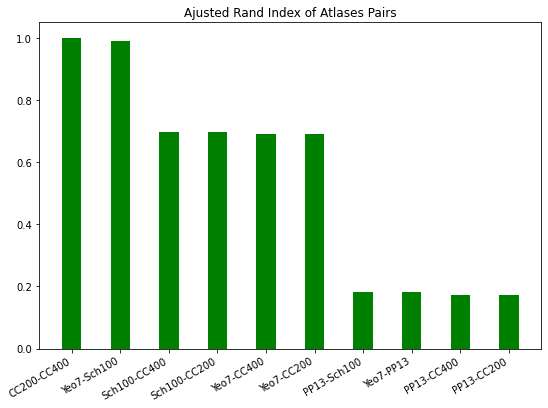

In [2]:
# Import Library

import matplotlib.pyplot as plt
import statistics 
import numpy as np



def Sorting(X,Y):
    X= np.array(X)
    Y= np.array(Y)
    for i in range(0,len(Y)-1):
        for j in range(i+1, len(Y)):
            if Y[i]<Y[j]:
                t=Y[i]
                Y[i]=Y[j]
                Y[j]=t
                t=X[i]
                X[i]=X[j]
                X[j]=t
    return X,Y
    
# Define Data
X=["Yeo7-PP13","Yeo7-Sch100","Yeo7-CC200","Yeo7-CC400",
   "PP13-Sch100","PP13-CC200", "PP13-CC400", 
   "Sch100-CC200","Sch100-CC400",
   "CC200-CC400",]

ARI=[0.18060657259179935, 0.990613206232229, 0.688949647821073, 0.6889498476627217, 0.1831837658567657,
     0.1709086543465134,  0.17095580091982218, 0.6973001258380311, 0.6973402412050993, 0.9997026745082092]


Y= np.array(ARI)

print (Y)

# mY=statistics.mean(Y)
# sdY=statistics.stdev(Y)

# Ynew= abs((Y-mY)/sdY)
# print(Ynew)
# print('mean=',mY,'  SD=', sdY)


Ynew=Y
# Y=[0.4557950572235646,0.8650384989956678,0.3637744972800908, 0.3737572909292819,
#    0.261300543053376,0.4557293521351907,0.4657000905687522,
#    0.3560901909407818, 0.3560963815603098, 
#    0.9998936473634868]


import matplotlib.pyplot as plt


# print(Ynew)
# Ynew= [0.0393106, 0.7027762, 0.0826565, 0.03960198, 0.044838,  0.15001063,
#  0.1531282,  0.0903805, 0.0409746,  0.22077452]


X,Ynew=Sorting(X,Ynew)
print(Ynew)


print
# Plot Bar chart
fig = plt.figure(figsize = (9, 6))
ax= plt.subplot()
# plt.bar(X, Y)

# Function to avoid overlapping
plt.bar(X, Ynew, color ='green', width = 0.4) #'maroon'
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.title("Ajusted Rand Index of Atlases Pairs")
# Display Chart

plt.show()
fig.savefig('ARI.jpg')
# //--------------------------------------------------------------------

In [1]:
# ------------------- Call ARI for Atlases with Master Atlas-----------------------
import numpy as np
import nibabel as nib
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
from scipy.special import comb
import nilearn.datasets as datasets
import nilearn.image as nlimg
# ----------------------------------------------------------------------------
def RandIndex_2Atlas(Atlas1_File,Desc1, Atlas2_File,Desc2):
    
# =============================== Start Processing ==========================    
# Load the two brain atlases as Nifti files
    atlas1 = nib.load(Atlas1_File) #"data4test/Shafer_17Networks.nii.gz")
    atlas2 = nib.load(Atlas2_File)


#     atlas2 = nlimg.resample_to_img(atlas2, atlas1)

# Get the data from the Nifti files
    atlas1_data = atlas1.get_fdata()
    atlas2_data = atlas2.get_fdata()

# Flatten the data into 1D arrays
    atlas1_flat = atlas1_data.flatten()
    atlas2_flat = atlas2_data.flatten()

# Calculate the rand coefficient
    rand_score = adjusted_rand_score(atlas1_flat, atlas2_flat)
#     rand_score = rand_index(atlas1_flat, atlas2_flat)
    
#     print('Rand Index of '+Desc1+' and '+Desc2+  ' = '+ str(rand_score))
    print(f"Rand Index of {Desc1} and {Desc2} = {rand_score}")
    return rand_score
# -----------------------------------------------------------------
L = [   "ReSampled_Atlases/K_resampled_Yeo7thick_atlas.nii.gz",
        "ReSampled_Atlases/K_resampled_power264_atlas.nii.gz",
        "ReSampled_Atlases/K_resampled_Schaefer100_atlas.nii.gz",
        "ReSampled_Atlases/K_resampled_CC200_atlas.nii.gz", #"ReSampled_Atlases/K_resampled_Caraddok748_atlas.nii.gz", # CC200
        "ReSampled_Atlases/K_resampled_CC400_atlas.nii.gz" #"ReSampled_Atlases/K_resampled_Gordon333_atlas.nii.gz"    ## CC400
        ]    
Des="ReSampled_Atlases/Master_HexaNet_ATLAS.nii.gz"
arrDes="Master"
# ----------------------------- "ATLASES/ReLab_Yeo17_Dos160.nii.gz" --------------------
Labels=['Yeo7','Power264','Shafer100','CC200','CC400']
arr = np.array(L)

Labelarr=np.array(Labels)

Y=[]

count=0
for i in range(0,len(L)):
#     for j in range(i+1, len(L)):
    count=count+1
    print("=========================== ", count," =============================")
    print(arr[i]," --- ",arrDes)
    ri=RandIndex_2Atlas(arr[i],' ',Des,' ')
    Y.append(ri)
    print('Rand Index of ', count,' = ',ri)
        
print(Y)       
#     DS,arrdice=dice_similarity_coefficient(arr[0], arr[i])
#     print('Dice Similarity=',DS)
#     ListDice.append (arrdice)

# ARI=[0.18060657259179935, 0.990613206232229, 0.688949647821073, 0.6889498476627217, 0.1831837658567657,
#      0.1709086543465134,  0.17095580091982218, 0.6973001258380311, 0.6973402412050993, 0.9997026745082092]

===========================  1  =============================
ReSampled_Atlases/K_resampled_Yeo7thick_atlas.nii.gz  ---  Master
Rand Index of   and   = 0.7809945215966263
Rand Index of  1  =  0.7809945215966263
===========================  2  =============================
ReSampled_Atlases/K_resampled_power264_atlas.nii.gz  ---  Master
Rand Index of   and   = 0.17938263479041042
Rand Index of  2  =  0.17938263479041042
===========================  3  =============================
ReSampled_Atlases/K_resampled_Schaefer100_atlas.nii.gz  ---  Master
Rand Index of   and   = 0.7802650215955057
Rand Index of  3  =  0.7802650215955057
===========================  4  =============================
ReSampled_Atlases/K_resampled_CC200_atlas.nii.gz  ---  Master
Rand Index of   and   = 0.7082135240665237
Rand Index of  4  =  0.7082135240665237
===========================  5  =============================
ReSampled_Atlases/K_resampled_CC400_atlas.nii.gz  ---  Master
Rand Index of   and   = 0.7082020

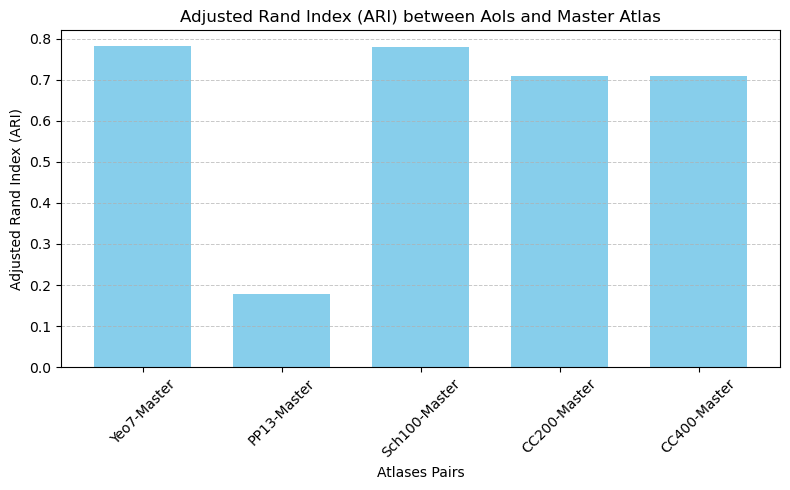

In [14]:
# # Plotting the bar chart with reduced bar width
# plt.figure(figsize=(8, 5))
# plt.bar(labels, ari_values, width=0.4, color='skyblue')  # Reduced bar width to 0.4
# plt.xlabel('Atlases Pairs ')
# plt.ylabel('Adjusted Rand Index (ARI)')
# plt.title('Adjusted Rand Index (ARI) between AoIs and Master Atlas')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
# -----------------------------------------------------
import matplotlib.pyplot as plt

# Example data
labels=['Yeo7-Master','PP13-Master','Sch100-Master','CC200-Master','CC400-Master']
ari_values=[0.7809945215966263, 0.17938263479041042, 0.7802650215955057, 0.7082135240665237, 0.7082020660186399]

# Plotting the bar chart with reduced bar width
plt.figure(figsize=(8, 5))
plt.bar(labels, ari_values, width=0.7, color='skyblue', align='center')  # Reduced bar width to 0.3 and set alignment

# Set the labels and title
plt.xlabel('Atlases Pairs')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.title('Adjusted Rand Index (ARI) between AoIs and Master Atlas')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Adding horizontal grid lines corresponding to the y-axis
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout to avoid cutting off elements
plt.tight_layout()

# Display the plot
plt.show()

# # Plotting the bar chart with adjusted bar width, color, and reduced spacing
# plt.figure(figsize=(8, 5))
# plt.bar(labels, ari_values, width=0.6, color='skyblue')  # Adjusting bar width and color
# plt.xlabel('Labels')
# plt.ylabel('Adjusted Rand Index (ARI)')
# plt.title('Adjusted Rand Index (ARI) for Different Labels')
# plt.xticks(rotation=45)
# plt.tight_layout()

# plt.show()

In [6]:
# -------------------------- Ajusted Mutual Information --------------------
import numpy as np
import nibabel as nib
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
from scipy.special import comb
import nilearn.datasets as datasets
import nilearn.image as nlimg
from matplotlib import pyplot as plt
from sklearn import metrics as skm
from argparse import ArgumentParser

def adjusted_mutual_info(atlas1, atlas2):
    """Calculate adjusted mutual information between two atlases

    Parameters
    ----------
    atlas1 : str
        path to the first atlas being analyzed
    atlas2: str
        path to the second atlas being analyzed
    """
    
    #Load in the atlas raw data
    at1 = nib.load(atlas1)
    at2 = nib.load(atlas2)

    atlas1 = at1.get_fdata()
    atlas2 = at2.get_fdata()
    
    # Flatten both matricies into a vector and feed into the function
    AMI = skm.adjusted_mutual_info_score(atlas1.flatten(),atlas2.flatten())

    # Return resulting value
    return AMI


L = [   "ReSampled_Atlases/K_resampled_Yeo7thick_atlas.nii.gz",
        "ReSampled_Atlases/K_resampled_power264_atlas.nii.gz",
        "ReSampled_Atlases/K_resampled_Schaefer100_atlas.nii.gz",
        "ReSampled_Atlases/K_resampled_CC200_atlas.nii.gz", #"ReSampled_Atlases/K_resampled_Caraddok748_atlas.nii.gz", # CC200
        "ReSampled_Atlases/K_resampled_CC400_atlas.nii.gz" #"ReSampled_Atlases/K_resampled_Gordon333_atlas.nii.gz"    ## CC400
        ]                        
                    # "ATLASES/ReLab_Yeo17_Dos160.nii.gz"
Labels=['Yeo7','Power264','Shafer100','CC200','CC400']
arr = np.array(L)

Labelarr=np.array(Labels)

Y=[]

count=0
for i in range(0,len(L)-1):
    for j in range(i+1, len(L)):
        count=count+1
        print("======================================= ", count," ===================================================")
        print(arr[i]," --- ",arr[j])
        ri=adjusted_mutual_info(arr[i],arr[j])
        Y.append(ri)
        print('Rand Index of ', count,' = ',ri)
#     DS,arrdice=dice_similarity_coefficient(arr[0], arr[i])
#     print('Dice Similarity=',DS)
#     ListDice.append (arrdice)


# Atlas_Pair=["Yeo7-PP13", "Yeo7-Sch100", "Yeo7-CC200", "Yeo7-CC400", "PP13-Sch100",
#             "PP13-CC200", "PP13-CC400", "Sch100-CC200","Sch100-CC400", "CC200-CC400"]

# ARI=[0.18060657259179935, 0.990613206232229, 0.688949647821073, 0.6889498476627217, 0.1831837658567657,
#      0.1709086543465134,  0.17095580091982218, 0.6973001258380311, 0.6973402412050993, 0.9997026745082092]

# AMI=[0.1376842425003243, 0.6999288305281965, 0.39521480734103226, 0.3856934541417774, 0.1703951509378802, 
#      0.1648609352454646, 0.1640306210004701, 0.5655641909551515,  0.5579660398356522, 0.8744223610403244]

=======================================  1  ===================================================
ReSampled_Atlases/K_resampled_Yeo7thick_atlas.nii.gz  ---  ReSampled_Atlases/K_resampled_power264_atlas.nii.gz
Rand Index of  1  =  0.1376842425003243
=======================================  2  ===================================================
ReSampled_Atlases/K_resampled_Yeo7thick_atlas.nii.gz  ---  ReSampled_Atlases/K_resampled_Schaefer100_atlas.nii.gz
Rand Index of  2  =  0.6999288305281965
=======================================  3  ===================================================
ReSampled_Atlases/K_resampled_Yeo7thick_atlas.nii.gz  ---  ReSampled_Atlases/K_resampled_CC200_atlas.nii.gz
Rand Index of  3  =  0.39521480734103226
=======================================  4  ===================================================
ReSampled_Atlases/K_resampled_Yeo7thick_atlas.nii.gz  ---  ReSampled_Atlases/K_resampled_CC400_atlas.nii.gz
Rand Index of  4  =  0.3856934541417774
==============

[0.13768424 0.69992883 0.39521481 0.38569345 0.17039515 0.16486094
 0.16403062 0.56556419 0.55796604 0.87442236]


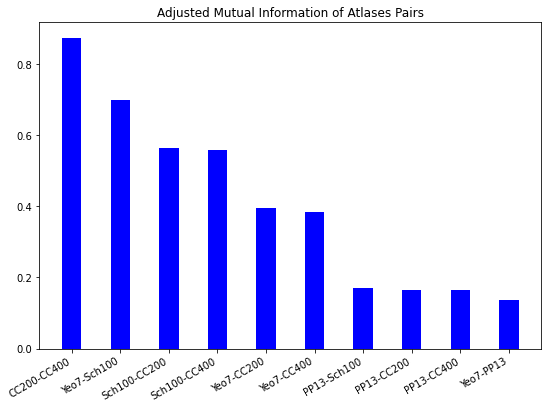

In [8]:
# Import Library -------------------- AMI 

import matplotlib.pyplot as plt
import statistics 



def Sorting(X,Y):
    X= np.array(X)
    Y= np.array(Y)
    for i in range(0,len(Y)-1):
        for j in range(i+1, len(Y)):
            if Y[i]<Y[j]:
                t=Y[i]
                Y[i]=Y[j]
                Y[j]=t
                t=X[i]
                X[i]=X[j]
                X[j]=t
    return X,Y
    
# Define Data
X=["Yeo7-PP13", "Yeo7-Sch100", "Yeo7-CC200", "Yeo7-CC400", "PP13-Sch100",
   "PP13-CC200", "PP13-CC400", "Sch100-CC200","Sch100-CC400", "CC200-CC400"]

# Y= [ 0.758994165973738, 0.9473817995427184, 0.7646330971705101,  0.8823476200456579,
#   0.7589096913814841, 0.9067254973445332, 0.759950190268885,
#   0.7661550796285365, 0.8912120463879035,
#    0.7661739885882852 ]

Y= np.array(Y)

print (Y)

# mY=statistics.mean(Y)
# sdY=statistics.stdev(Y)

# Ynew= abs((Y-mY)/sdY)
# print(Ynew)
# print('mean=',mY,'  SD=', sdY)


Ynew=Y
# Y=[0.4557950572235646,0.8650384989956678,0.3637744972800908, 0.3737572909292819,
#    0.261300543053376,0.4557293521351907,0.4657000905687522,
#    0.3560901909407818, 0.3560963815603098, 
#    0.9998936473634868]


import matplotlib.pyplot as plt


# print(Ynew)
# Ynew= [0.0393106, 0.7027762, 0.0826565, 0.03960198, 0.044838,  0.15001063,
#  0.1531282,  0.0903805, 0.0409746,  0.22077452]


X,Ynew=Sorting(X,Ynew)

print
# Plot Bar chart
fig = plt.figure(figsize = (9, 6))
ax= plt.subplot()
# plt.bar(X, Y)

# Function to avoid overlapping
plt.bar(X, Ynew, color ='blue', width = 0.4) #'maroon'
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.title("Adjusted Mutual Information of Atlases Pairs")
# Display Chart

plt.show()
fig.savefig('AMI.jpg')

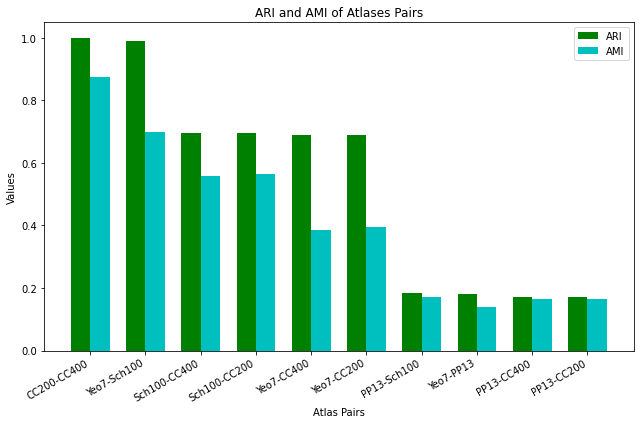

In [17]:
import matplotlib.pyplot as plt


Atlas_Pairs=["Yeo7-PP13", "Yeo7-Sch100", "Yeo7-CC200", "Yeo7-CC400", "PP13-Sch100",
            "PP13-CC200", "PP13-CC400", "Sch100-CC200","Sch100-CC400", "CC200-CC400"]

ARI=[0.18060657259179935, 0.990613206232229, 0.688949647821073, 0.6889498476627217, 0.1831837658567657,
     0.1709086543465134,  0.17095580091982218, 0.6973001258380311, 0.6973402412050993, 0.9997026745082092]

AMI=[0.1376842425003243, 0.6999288305281965, 0.39521480734103226, 0.3856934541417774, 0.1703951509378802, 
     0.1648609352454646, 0.1640306210004701, 0.5655641909551515,  0.5579660398356522, 0.8744223610403244]
    



def Sorting(X,Y,Z):
    X= np.array(X)
    Y= np.array(Y)
    Z= np.array(Z)
    
    for i in range(0,len(Y)-1):
        for j in range(i+1, len(Y)):
            if Y[i]<Y[j]:
                t=Y[i]
                Y[i]=Y[j]
                Y[j]=t
                t=X[i]
                X[i]=X[j]
                X[j]=t
                t=Z[i]
                Z[i]=Z[j]
                Z[j]=t
    return X,Y,Z


Xn,Yn,Zn=Sorting(Atlas_Pairs,ARI,AMI)

# Sample data
X = Xn #Atlas_Pairs #['Category A', 'Category B', 'Category C', 'Category D', 'Category E']
Y1 = Yn # ARI #[15, 25, 10, 30, 20]
Y2 = Zn #AMI #[10, 20, 15, 25, 30]

# Create a figure and axis
fig, ax = plt.subplots(figsize = (9, 6))
# fig = plt.figure()

# Create bar charts for Y1 and Y2
bar_width = 0.35  # Width of the bars
index = range(len(X))  # X-axis indices for bars

# Bar chart for Y1
bars1 = ax.bar(index, Y1, bar_width, label='ARI', color='g')

# Bar chart for Y2 (offsetting the bars for side-by-side display)
bars2 = ax.bar([i + bar_width for i in index], Y2, bar_width, label='AMI', color='c')

# Set labels and title
ax.set_xlabel('Atlas Pairs')
ax.set_ylabel('Values')
ax.set_title('ARI and AMI of Atlases Pairs') 
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(X)
ax.legend()

# Function to avoid overlapping
# plt.bar(X, Ynew, color ='blue', width = 0.4) #'maroon'
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

# Show the plot
plt.tight_layout()  # To prevent labels from getting cut off
plt.show()
fig.savefig('ARI_AMI.jpg')

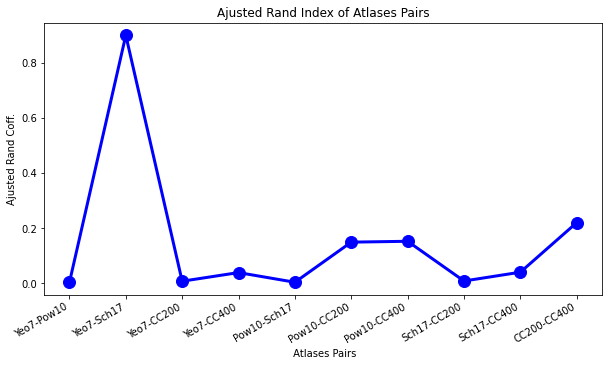

In [41]:
import matplotlib.pyplot as plt

# x axis values
x = X #[1,2,3,4,5,6]
# corresponding y axis values
y = Y #[2,4,1,5,2,6]

fig = plt.figure(figsize = (10, 5))
ax= plt.subplot()
# plotting the points
plt.plot(x, y, color='blue', linestyle='-', linewidth = 3,   #'dashed'
		marker='o', markerfacecolor='blue', markersize=12)  #'o' '*'
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
# setting x and y axis range
# plt.ylim(1,8)
# plt.xlim(1,8)

# naming the x axis
plt.xlabel(' Atlases Pairs')
# naming the y axis
plt.ylabel('Ajusted Rand Coff.')

# giving a title to my graph
plt.title('Ajusted Rand Index of Atlases Pairs')

# function to show the plot
plt.show()


In [ ]:
# https://mk-hasan.github.io/posts/2020/04/blog-post-4/

import numpy as np
from scipy.special import comb

  


def adjusted_rand_index(true_labels, pred_labels):
    """
    Computes the adjusted Rand index.
    
    Args:
    true_labels (np.ndarray): array of true cluster labels
    pred_labels (np.ndarray): array of predicted cluster labels
    
    Returns:
    float: the adjusted Rand index
    """
    
    # converting list to array 
    true_labels = np.array(true_labels) 
    pred_labels = np.array(pred_labels) 
        
    
    
    contingency_table = contingency(true_labels, pred_labels)
    print ('contingency_table \n', contingency_table)
    n_samples = contingency_table.sum()
    sum_comb_c = sum(comb(n_c, 2) for n_c in np.sum(contingency_table, axis=1))
    sum_comb_k = sum(comb(n_k, 2) for n_k in np.sum(contingency_table, axis=0))
    sum_comb = sum(comb(n_ij, 2) for n_ij in contingency_table.flatten())
    prod_comb = (sum_comb_c * sum_comb_k) / comb(n_samples, 2)
    mean_comb = (sum_comb_k + sum_comb_c) / 2.
    return (sum_comb - prod_comb) / (mean_comb - prod_comb)

def contingency(true_labels, pred_labels):
    """
    Computes the contingency table.
    
    Args:
    true_labels (np.ndarray): array of true cluster labels
    pred_labels (np.ndarray): array of predicted cluster labels
    
    Returns:
    np.ndarray: the contingency table
    """
    n_samples = true_labels.shape[0]
    n_classes = np.amax(true_labels) + 1
    n_clusters = np.amax(pred_labels) + 1
    print('n_classes=', n_classes, ' n_clusters=', n_clusters, ' n_samples=', n_samples)
    contingency_table = np.zeros((n_classes, n_clusters))
    
    for i in range(n_samples):
        contingency_table[true_labels[i], pred_labels[i]] += 1
    return contingency_table

x = [1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 2, 2]
y = [3, 2, 3, 2, 2, 1, 1, 2, 3, 1, 3, 1]

ARI=adjusted_rand_index(x,y) #[1, 1, 1, 2, 2], [1, 1, 2, 2, 3]
rand_coeff = adjusted_rand_score(x,y)


print('Rand Index=', rand_index(x,y))
print('ARI=',ARI)
print('rand_coeff=', rand_coeff)

# Adjusted Mutual Information Tutorial:

In [ ]:
import nibabel as nb
import numpy as np
import glob
from matplotlib import pyplot as plt
from sklearn import metrics as skm
from argparse import ArgumentParser
import sys

In [ ]:


input_dir = '/Users/ross/Documents/neuroparc/atlases/label/Human'
output_dir = '/Users/ross/Documents/neuroparc/atlases'
fig_name = 'AMI_analysis'
voxel_size = '1'
atlases = ['AAL_space-MNI152NLin6_res-1x1x1.nii.gz','AICHAJoliot2015_space-MNI152NLin6_res-1x1x1.nii.gz']

#Necessary for running this function in a jupyter notebook
sys.argv = ['',input_dir, '--output_dir',output_dir,'--fig_name',fig_name,'--voxel_size',voxel_size, '--atlases',atlases[0],atlases[1]]

In [ ]:
def adjusted_mutual_info(atlas1, atlas2):
    """Calculate adjusted mutual information between two atlases

    Parameters
    ----------
    atlas1 : str
        path to the first atlas being analyzed
    atlas2: str
        path to the second atlas being analyzed
    """
    
    #Load in the atlas raw data
    at1 = nb.load(atlas1)
    at2 = nb.load(atlas2)

    print(at1.shape, at2.shape)
    at1 = nlimg.resample_to_img(at1, at2)
        
    atlas1 = at1.get_fdata()
    atlas2 = at2.get_fdata()
    
    #Flatten both matricies into a vector and feed into the function
    AMI = skm.adjusted_mutual_info_score(atlas1.flatten(),atlas2.flatten())

    #Return resulting value
    return AMI


yeo = datasets.fetch_atlas_yeo_2011()
yeo17_file = yeo['thick_17']
power10_file="data4test/PowerAtlas_10Networks.nii.gz"
power264_file= 'data4test/power264MNI.nii.gz'
shafer17_file= "data4test/Shafer_17Networks.nii.gz"
atlas_shafer= datasets.fetch_atlas_schaefer_2018(n_rois=100,yeo_networks=17)
Shafer100_file =atlas_shafer['maps'] 

AMI = adjusted_mutual_info(yeo17_file,power264_file)
AMI_array[int(i)][int(j)]=float(AMI)
AMI_array[int(j)][int(i)]=float(AMI)

In [ ]:
import numpy as np
from sklearn.metrics import adjusted_rand_score

# Generate example brain atlases
atlas1 = np.array([1, 1, 2, 2, 3, 3])
atlas2 = np.array([1, 1, 2, 3, 3, 3])

# Compute Rand Index
rand_index = adjusted_rand_score(atlas1, atlas2)
print("Rand Index:", rand_index)

# Generate example voxel values
voxel_values = np.array([1.2, 1.5, 0.8, 2.1, 1.9, 2.3])

# Compute z-score for each voxel
mean = np.mean(voxel_values)
std = np.std(voxel_values)
z_scores = (voxel_values - mean) / std
print("Z-scores:", z_scores)


In [ ]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Generate two example brain atlases (cluster assignments for each voxel)
atlas1 = np.array([0, 0, 1, 1, 2, 2, 2, 3])
atlas2 = np.array([0, 0, 1, 1, 2, 2, 4, 4])

# Compute the Rand Index between the two atlases
ri = adjusted_rand_score(atlas1, atlas2)
print("Rand Index:", ri )  # , '   rand=', rand_index(atlas1,atlas2)

# Calculate the z-score for the Rand Index of each voxel
voxels = len(atlas1)
ri_per_voxel = np.zeros(voxels)

for voxel in range(voxels):
    atlas1_voxel = np.copy(atlas1)
    atlas2_voxel = np.copy(atlas2)
    
    # Assign a unique value to the voxel of interest
    atlas1_voxel[voxel] = atlas1.max() + 1
    atlas2_voxel[voxel] = atlas2.max() + 1
    
    # Compute the Rand Index for the modified atlases
    ri_per_voxel[voxel] = adjusted_rand_score(atlas1_voxel, atlas2_voxel)

# Calculate the mean and standard deviation of the z-scores
z_mean = ri_per_voxel.mean()
z_std = ri_per_voxel.std()

# Compute the z-score for each voxel's Rand Index
z_scores = (ri_per_voxel - z_mean) / z_std

# Print the z-scores for each voxel
for voxel, z_score in enumerate(z_scores):
    print("Voxel", voxel, "z-score:", z_score)


In [4]:
import numpy as np
import nibabel as nib
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
from scipy.special import comb
import nilearn.datasets as datasets
import nilearn.image as nlimg

#define Rand index function
def rand_index(actual, pred):
    
        # converting list to array 
    actual = np.array(actual) 
    pred = np.array(pred) 
    
    actual = actual.astype(int)
    pred = pred.astype(int)

    tp_plus_fp = comb(np.bincount(actual), 2).sum()
    tp_plus_fn = comb(np.bincount(pred), 2).sum()
    A = np.c_[(actual, pred)]
#     print(A)
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(actual))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    print(f"tp={tp} tn={tn} fp={fp} fn={fn} ")
    return (tp + tn) / (tp + fp + fn + tn)

#calculate Rand index
# print(rand_index([1, 1, 1, 2, 2], [1, 1, 2, 2, 3]))

def RandIndex_2Atlas(Atlas1_File,Desc1, Atlas2_File,Desc2):
    
# =============================== Start Processing ==========================    
# Load the two brain atlases as Nifti files
    atlas1 = nib.load(Atlas1_File) #"data4test/Shafer_17Networks.nii.gz")
    atlas2 = nib.load(Atlas2_File)


#     atlas2 = nlimg.resample_to_img(atlas2, atlas1)

# Get the data from the Nifti files
    atlas1_data = atlas1.get_fdata()
    atlas2_data = atlas2.get_fdata()

# Flatten the data into 1D arrays
    atlas1_flat = atlas1_data.flatten()
    atlas2_flat = atlas2_data.flatten()

# Calculate the rand coefficient
    rand_score = adjusted_rand_score(atlas1_flat, atlas2_flat)
#     rand_score = rand_index(atlas1_flat, atlas2_flat)
    
#     print('Rand Index of '+Desc1+' and '+Desc2+  ' = '+ str(rand_score))
#     print(f"Rand Index of {Desc1} and {Desc2} = {rand_score}")
    return rand_score

# ===================================================================================

def Get_Arr(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()

    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    atlas_flat[atlas_flat>0]=1
    return atlas_flat


input_dir=r'C:\Users\IT-Department\LLN Code Python\2nd Code\Work4ThesisInshallah\Output_NOIs'
atlases=['Kresampled_Yeo7-6RSNs_atlas.nii.gz',
         'Kresampled_Power-6RSNs_atlas.nii.gz',
         'Kresampled_Shafer-6RSNs_atlas.nii.gz',
         'Kresampled_CradCC200-6RSNs_atlas.nii.gz',
         'Kresampled_CradCC400-6RSNs_atlas.nii.gz']

MasAtlas='Master_HexaNet_ATLAS.nii.gz'
# '666_HexaNet_CRN_Atlas_6RSNs.nii.gz'#'Master_HexaNet_ATLAS.nii.gz'

print(f"------------ARI {MasAtlas} -----------------")
for atlas in atlases:
    f1=input_dir+'\\'+MasAtlas
    f2=input_dir+'\\'+atlas
    Arr1=Get_Arr(input_dir+'\\'+MasAtlas)
    Arr2=Get_Arr(input_dir+'\\'+atlas)
    # Calculate Jaccard Index
    ARI = RandIndex_2Atlas(f1,'', f2, '')
    print(f"Ajusted Rand Index {atlas}= {ARI}")
    


------------ARI Master_HexaNet_ATLAS.nii.gz -----------------
Ajusted Rand Index Kresampled_Yeo7-6RSNs_atlas.nii.gz= 0.841847854972507
Ajusted Rand Index Kresampled_Power-6RSNs_atlas.nii.gz= 0.1729651757550313
Ajusted Rand Index Kresampled_Shafer-6RSNs_atlas.nii.gz= 0.8463949676306938
Ajusted Rand Index Kresampled_CradCC200-6RSNs_atlas.nii.gz= 0.7084585184796943
Ajusted Rand Index Kresampled_CradCC400-6RSNs_atlas.nii.gz= 0.6900288799129024


In [6]:
input_dir=r'C:\Users\IT-Department\LLN Code Python\2nd Code\Work4ThesisInshallah\Output_NOIs'
atlases=['Kresampled_Yeo7-6RSNs_atlas.nii.gz',
         'Kresampled_Power-6RSNs_atlas.nii.gz',
         'Kresampled_Shafer-6RSNs_atlas.nii.gz',
         'Kresampled_CradCC200-6RSNs_atlas.nii.gz',
         'Kresampled_CradCC400-6RSNs_atlas.nii.gz']


for i in range(0,len(atlases)-1):
    for j in range(i+1, len(atlases)):
#         count=count+1
#         print("======================================= ", count," ===================================================")
#         print(atlases[i]," --- ",atlases[j])
        f1=input_dir+'\\'+atlases[i]
        f2=input_dir+'\\'+atlases[j]
        
        ARI = RandIndex_2Atlas(f1,'', f2, '')
        print(f"Ajusted Rand Index {atlases[i]} vs. {atlases[j]}= {ARI}")

Ajusted Rand Index Kresampled_Yeo7-6RSNs_atlas.nii.gz vs. Kresampled_Power-6RSNs_atlas.nii.gz= 0.1886658667049954
Ajusted Rand Index Kresampled_Yeo7-6RSNs_atlas.nii.gz vs. Kresampled_Shafer-6RSNs_atlas.nii.gz= 0.9175132188357131
Ajusted Rand Index Kresampled_Yeo7-6RSNs_atlas.nii.gz vs. Kresampled_CradCC200-6RSNs_atlas.nii.gz= 0.5997350283551176
Ajusted Rand Index Kresampled_Yeo7-6RSNs_atlas.nii.gz vs. Kresampled_CradCC400-6RSNs_atlas.nii.gz= 0.6894714448085257
Ajusted Rand Index Kresampled_Power-6RSNs_atlas.nii.gz vs. Kresampled_Shafer-6RSNs_atlas.nii.gz= 0.18124978854092041
Ajusted Rand Index Kresampled_Power-6RSNs_atlas.nii.gz vs. Kresampled_CradCC200-6RSNs_atlas.nii.gz= 0.17078529671209305
Ajusted Rand Index Kresampled_Power-6RSNs_atlas.nii.gz vs. Kresampled_CradCC400-6RSNs_atlas.nii.gz= 0.197623242715793
Ajusted Rand Index Kresampled_Shafer-6RSNs_atlas.nii.gz vs. Kresampled_CradCC200-6RSNs_atlas.nii.gz= 0.5919025427208917
Ajusted Rand Index Kresampled_Shafer-6RSNs_atlas.nii.gz vs. 

In [12]:
dd=r'C:\Users\IT-Department\LLN Code Python\2nd Code\Work4ThesisInshallah\ReSampled_Atlases'

atlases = ["K_resampled_Yeo7thick_atlas.nii.gz",
        "K_resampled_power264_atlas.nii.gz",
        "K_resampled_Schaefer100_atlas.nii.gz",
        "K_resampled_CC200_atlas.nii.gz", #"ReSampled_Atlases/K_resampled_Caraddok748_atlas.nii.gz", # CC200
        "K_resampled_CC400_atlas.nii.gz" #"ReSampled_Atlases/K_resampled_Gordon333_atlas.nii.gz"    ## CC400
        ] 

for i in range(0,len(atlases)-1):
    for j in range(i+1, len(atlases)):
#         count=count+1
#         print("======================================= ", count," ===================================================")
#         print(atlases[i]," --- ",atlases[j])
        f1=dd+'\\'+atlases[i]
        f2=dd+'\\'+atlases[j]
        
        ARI = RandIndex_2Atlas(f1,'', f2, '')
        print(f"Ajusted Rand Index {atlases[i]} vs. {atlases[j]}= {ARI}")

Ajusted Rand Index K_resampled_Yeo7thick_atlas.nii.gz vs. K_resampled_power264_atlas.nii.gz= 0.18060657259179935
Ajusted Rand Index K_resampled_Yeo7thick_atlas.nii.gz vs. K_resampled_Schaefer100_atlas.nii.gz= 0.990613206232229
Ajusted Rand Index K_resampled_Yeo7thick_atlas.nii.gz vs. K_resampled_CC200_atlas.nii.gz= 0.688949647821073
Ajusted Rand Index K_resampled_Yeo7thick_atlas.nii.gz vs. K_resampled_CC400_atlas.nii.gz= 0.6889498476627217
Ajusted Rand Index K_resampled_power264_atlas.nii.gz vs. K_resampled_Schaefer100_atlas.nii.gz= 0.1831837658567657
Ajusted Rand Index K_resampled_power264_atlas.nii.gz vs. K_resampled_CC200_atlas.nii.gz= 0.1709086543465134
Ajusted Rand Index K_resampled_power264_atlas.nii.gz vs. K_resampled_CC400_atlas.nii.gz= 0.17095580091982218
Ajusted Rand Index K_resampled_Schaefer100_atlas.nii.gz vs. K_resampled_CC200_atlas.nii.gz= 0.6973001258380311
Ajusted Rand Index K_resampled_Schaefer100_atlas.nii.gz vs. K_resampled_CC400_atlas.nii.gz= 0.6973402412050993
Aju

In [13]:
# ---------------- Display Only -----------------------
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn import plotting
import nilearn.datasets as datasets
from nilearn.image import new_img_like
from nilearn import input_data, connectome, plotting

#----- function for plotting-------------------
def plotting_image(img,Title):
    plotting.plot_stat_map(
    img, cmap='tab10',  #Paired
    title=Title )
    plotting.show()


def Display_Img_Labels(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()

    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)

#     atlas_flat[atlas_flat > 0]= 1
#     atlas_flat[atlas_flat < 0]= 0
    # Get the voxel dimensions from the loaded image
    x, y, z = atlas_img.shape[:3]
    print(f" Atlas Dim={atlas_img.shape}")
    # Calculate the total number of voxels
    num_voxels = x * y * z

    # Count the non-zero voxels
    non_zero_voxels = np.count_nonzero(atlas_data)

    uniq_labels=np.unique(atlas_flat)
#     index = 0
#     if uniq_labels[index]==0:
#         uniq_labels = np.delete(uniq_labels, index)

    no_of_labels=len(uniq_labels)

    print(atlasFile)
    print('no_of_labels =',no_of_labels)
    print('uniqe labels =',uniq_labels)
    print(f" Atlas Dim={atlas_img.shape}")
    print('No. of Non-Zero Voxels =', non_zero_voxels)
    print('Size of brain Atlas (No. of Voxels) =', num_voxels)

    
dd=r'C:\Users\IT-Department\LLN Code Python\2nd Code\Work4ThesisInshallah\ReSampled_Atlases'

atlases = ["K_resampled_Yeo7thick_atlas.nii.gz",
        "K_resampled_power264_atlas.nii.gz",
        "K_resampled_Schaefer100_atlas.nii.gz",
        "K_resampled_CC200_atlas.nii.gz", #"ReSampled_Atlases/K_resampled_Caraddok748_atlas.nii.gz", # CC200
        "K_resampled_CC400_atlas.nii.gz" #"ReSampled_Atlases/K_resampled_Gordon333_atlas.nii.gz"    ## CC400
        ]     
# Img=r"C:\Users\IT-Department\LLN Code Python\2nd Code\Work4ThesisInshallah\Output_NOIs\Label_4_Unified_atlas.nii.gz"
for atlas in atlases:
    f1=dd+'\\'+atlas
#     plotting_image(Img,"100 parcels")
    Display_Img_Labels(f1)


C:\Users\IT-Department\anaconda3\envs\tf\lib\site-packages\nilearn\input_data\__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


 Atlas Dim=(182, 218, 182, 1)
C:\Users\IT-Department\LLN Code Python\2nd Code\Work4ThesisInshallah\ReSampled_Atlases\K_resampled_Yeo7thick_atlas.nii.gz
no_of_labels = 8
uniqe labels = [0 1 2 3 4 5 6 7]
 Atlas Dim=(182, 218, 182, 1)
No. of Non-Zero Voxels = 1054733
Size of brain Atlas (No. of Voxels) = 7221032
 Atlas Dim=(182, 218, 182)
C:\Users\IT-Department\LLN Code Python\2nd Code\Work4ThesisInshallah\ReSampled_Atlases\K_resampled_power264_atlas.nii.gz
no_of_labels = 265
uniqe labels = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 